# **[ 머신러닝 프로젝트 2 : 손글씨 숫자 인식 ]**

In [3]:
!pip install "dask[complete]"

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.9 MB/s eta 0:00:00


In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import joblib
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [5]:
# 1. 데이터 로드
mnist_data = fetch_openml('mnist_784', version=1)

In [6]:
mnist_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
mnist_data.feature_names

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [8]:
mnist_data.target_names

['class']

In [9]:
mnist_data.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [10]:
X, y = mnist_data.data, mnist_data.target.astype('int')

In [11]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [13]:
# 2. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(56000, 784)
(56000,)
(14000, 784)
(14000,)


In [15]:
# 1-1. 데이터 로드
(X_train_1, y_train_1), (X_test_1, y_test_1) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [16]:
print(X_train_1.shape)
print(y_train_1.shape)
print(X_test_1.shape)
print(y_test_1.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


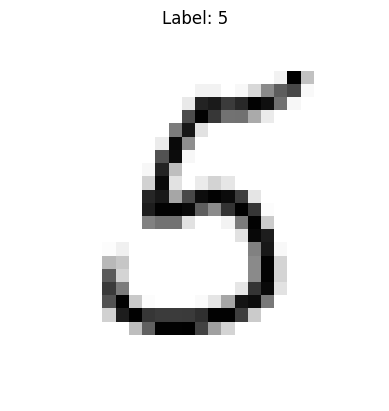

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  26  255  90  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  26  26  0  13  64  138  180  199  11  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  41  224  232  207  221  253  242  162  17  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  195  253  210  160  161  111  38  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  151  236  50  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  38  247  134  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  191  244  17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  17  224  94  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0 

In [17]:
import sys

# 첫 번째 손글씨 이미지를 시각화
first_image = X_train.iloc[0].values.reshape(28, 28)

plt.imshow(first_image, cmap='Greys')
plt.title(f"Label: {y_train.iloc[0]}")
plt.axis('off')
plt.show()

# 첫 번째 손글씨 이미지의 모든 데이터를 출력
for x in first_image:
    for i in x:
        sys.stdout.write('%d  ' % i)
    sys.stdout.write('\n')

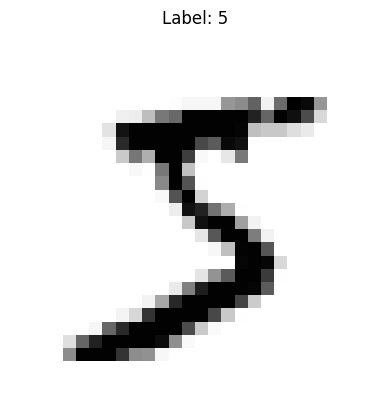

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18  18  18  126  136  175  26  166  255  247  127  0  0  0  0  
0  0  0  0  0  0  0  0  30  36  94  154  170  253  253  253  253  253  225  172  253  242  195  64  0  0  0  0  
0  0  0  0  0  0  0  49  238  253  253  253  253  253  253  253  253  251  93  82  82  56  39  0  0  0  0  0  
0  0  0  0  0  0  0  18  219  253  253  253  253  253  198  182  247  241  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80  156  107  253  253  205  11  0  43  154  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14  1  154  253

In [18]:
import sys

# 첫 번째 손글씨 이미지를 시각화
first_image = X_train_1[0]

plt.imshow(first_image, cmap='Greys')
plt.title(f"Label: {y_train_1[0]}")
plt.axis('off')
plt.show()

# 첫 번째 손글씨 이미지의 모든 데이터를 출력
for x in first_image:
    for i in x:
        sys.stdout.write('%d  ' % i)
    sys.stdout.write('\n')

In [19]:
# 3. 데이터 정규화 (0~1 범위로)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# 딥러닝 모델은 데이터를 28x28로 reshape 필요
X_train_reshaped = X_train.values.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test.values.reshape(-1, 28, 28, 1)

In [21]:
# One-hot encoding for deep learning
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

Logistic Regression: Accuracy = 0.9158, Loss = 0.3759, Time = 46.66s


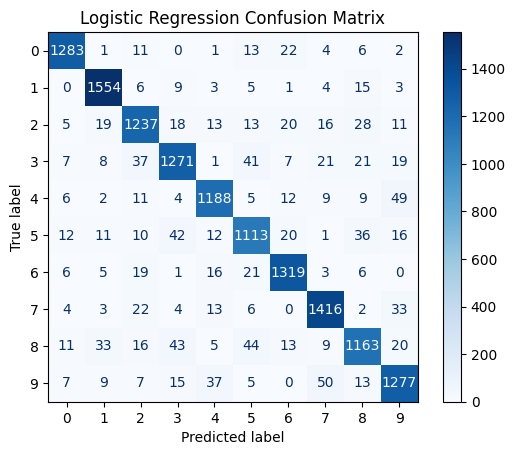

KNN: Accuracy = 0.9458, Loss = 0.6714, Time = 71.33s


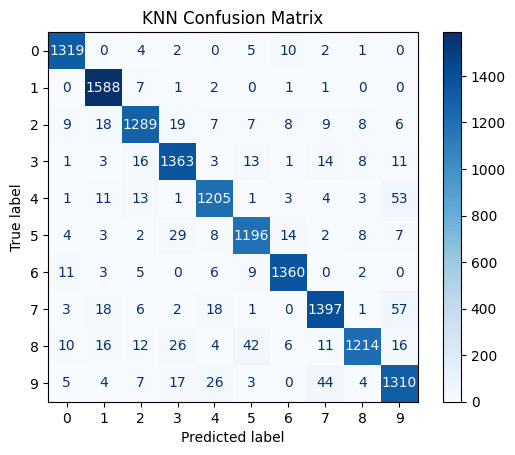

SVM: Accuracy = 0.9630, Loss = 0.1221, Time = 2275.07s


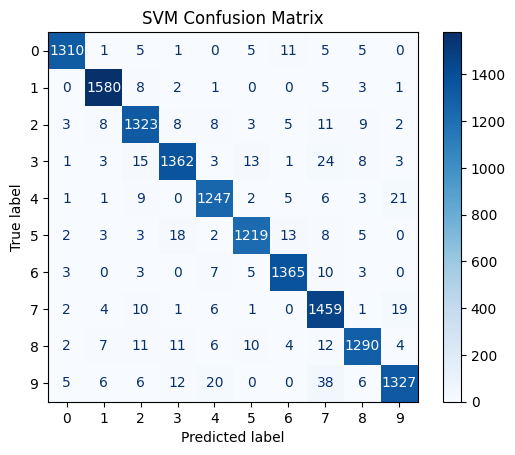

Decision Tree: Accuracy = 0.8744, Loss = 4.5286, Time = 20.04s


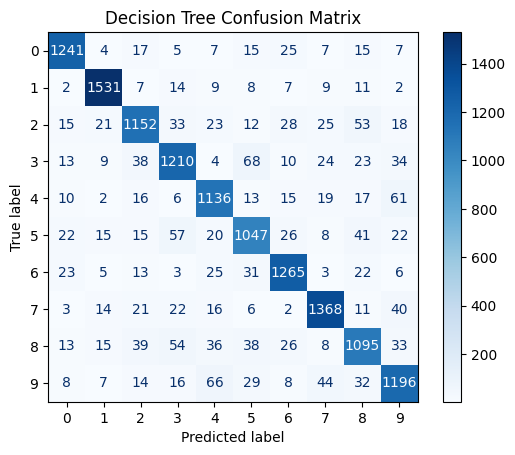

Random Forest: Accuracy = 0.9665, Loss = 0.2560, Time = 45.99s


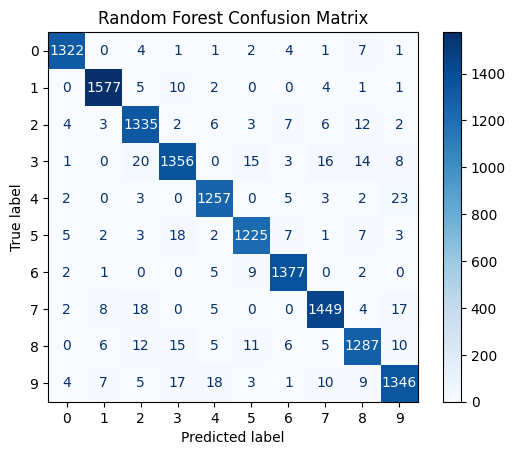

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:26:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost: Accuracy = 0.9781, Loss = 0.0733, Time = 470.81s


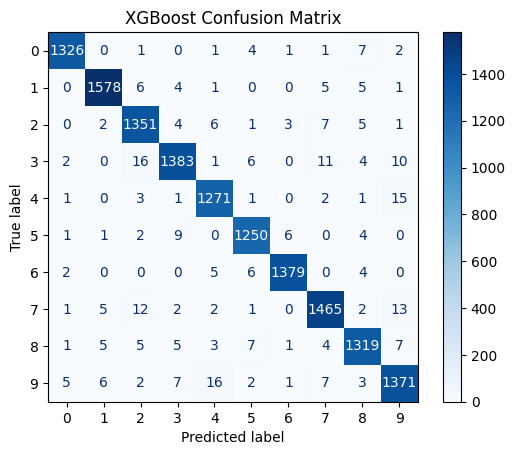

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.498201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 111332
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 626
[LightGBM] [Info] Start training from score -2.309754
[LightGBM] [Info] Start training from score -2.188460
[LightGBM] [Info] Start training from score -2.300801
[LightGBM] [Info] Start training from score -2.283483
[LightGBM] [Info] Start training from score -2.315345
[LightGBM] [Info] Start training from score -2.407946
[LightGBM] [Info] Start training from score -2.324247
[LightGBM] [Info] Start training from score -2.269219
[LightGBM] [Info] Start training from score -2.326439
[LightGBM] [Info] Start training from score -2.313718
LightGBM: Accuracy = 0.9759, Loss = 0.0772, Time = 165.51s


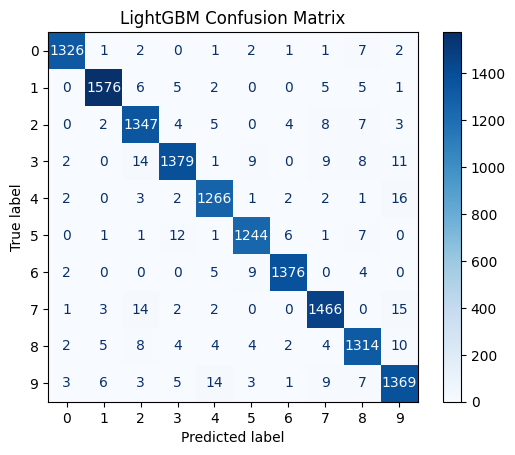

In [26]:
# 모델별 결과 저장
results = {}

# 머신러닝 모델 리스트
models_ml = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', gamma='scale', probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier()
}

for name, model in models_ml.items():
    start = time()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    end = time()
    acc = accuracy_score(y_test, y_pred)
    loss = log_loss(y_test, y_pred_proba)
    results[name] = {'accuracy': acc, 'loss': loss, 'time': end - start}
    print(f"{name}: Accuracy = {acc:.4f}, Loss = {loss:.4f}, Time = {end - start:.2f}s")

    # 혼동 행렬 출력
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot(cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

In [247]:
# 모델별 결과 저장
results = {}

# 딥러닝 모델 - FNN
models_dl = {
    "FNN": Sequential([
        Dense(128, activation='relu', input_shape=(28*28,)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ]),
    "CNN": Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])}

for name, model in models_dl.items():
    start = time()

    if name == "FNN":
        X_train_dl = X_train_scaled
        X_test_dl = X_test_scaled
    else:
        X_train_dl = X_train_reshaped
        X_test_dl = X_test_reshaped

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train_dl, y_train_categorical, epochs=10, batch_size=32, verbose=1)
    end = time()
    loss, acc = model.evaluate(X_test_dl, y_test_categorical, verbose=1)
    results[name] = {'accuracy': acc, 'loss': loss, 'time': time() - start}
    print(f"{name}: Accuracy = {acc:.4f}, Loss = {loss:.4f}, Time = {time() - start:.2f}s\n")

Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8843 - loss: 0.3946
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9713 - loss: 0.0966
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9801 - loss: 0.0654
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9841 - loss: 0.0474
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9890 - loss: 0.0352
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9907 - loss: 0.0310
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9922 - loss: 0.0246
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9917 - loss: 0.0265
Epoch 9/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9931 - loss: 0.0244
Epoch 10/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9905 - loss: 0.0360
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9715 - loss: 0.1998
FNN: Accuracy = 0.9701, Loss = 0.1929,

Epoch 1/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7746 - loss: 0.6760 - val_accuracy: 0.9331 - val_loss: 0.2226
Epoch 2/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9329 - loss: 0.2206 - val_accuracy: 0.9367 - val_loss: 0.2048
Epoch 3/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9461 - loss: 0.1806 - val_accuracy: 0.9562 - val_loss: 0.1575
Epoch 4/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9528 - loss: 0.1616 - val_accuracy: 0.9359 - val_loss: 0.2157
Epoch 5/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9525 - loss: 0.1574 - val_accuracy: 0.9559 - val_loss: 0.1577
Epoch 6/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9575 - loss: 0.1445 - val_accuracy: 0.9504 - val_loss: 0.1843
Epoch 7/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9588 - loss: 0.1425 - val_accuracy: 0.9583 - val_loss: 0.1466
Epoch 8/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9619 -

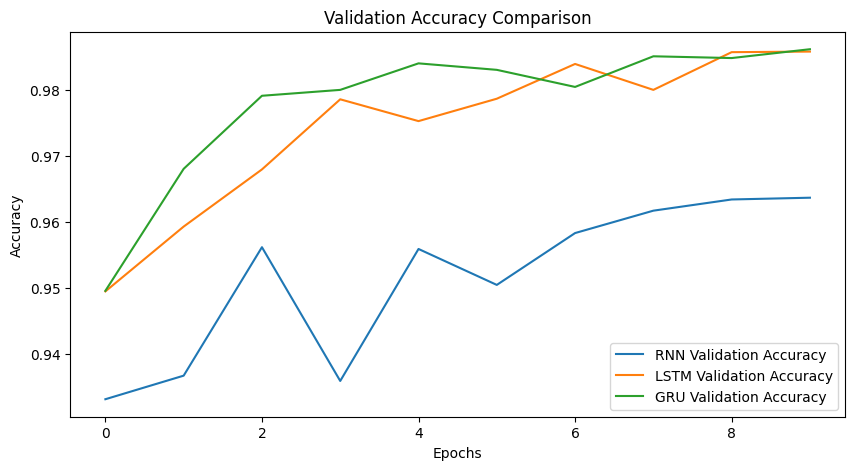

In [258]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense

X_train_norm = X_train_reshaped.astype('float32') / 255.0  # 정규화
X_test_norm = X_test_reshaped.astype('float32') / 255.0

# 2. 모델 정의 함수
def build_rnn_model():
    model = Sequential([
        SimpleRNN(128, activation='tanh', input_shape=(28, 28)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

def build_lstm_model():
    model = Sequential([
        LSTM(128, activation='tanh', input_shape=(28, 28)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

def build_gru_model():
    model = Sequential([
        GRU(128, activation='tanh', input_shape=(28, 28)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# 3. 모델 학습 및 평가 함수
def train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=32):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train_categorical, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)
    test_loss, test_acc = model.evaluate(X_test, y_test_categorical, verbose=1)
    return history, test_acc

# 4. RNN 모델 학습 및 평가
rnn_model = build_rnn_model()
rnn_history, rnn_acc = train_and_evaluate(rnn_model, X_train, y_train_categorical, X_test, y_test_categorical)
print(f"RNN Test Accuracy: {rnn_acc:.4f}")

# 5. LSTM 모델 학습 및 평가
lstm_model = build_lstm_model()
lstm_history, lstm_acc = train_and_evaluate(lstm_model, X_train, y_train_categorical, X_test, y_test_categorical)
print(f"LSTM Test Accuracy: {lstm_acc:.4f}")

# 6. GRU 모델 학습 및 평가
gru_model = build_gru_model()
gru_history, gru_acc = train_and_evaluate(gru_model, X_train, y_train_categorical, X_test, y_test_categorical)
print(f"GRU Test Accuracy: {gru_acc:.4f}")

# 7. 학습 결과 시각화 함수
def plot_history(histories, title):
    plt.figure(figsize=(10, 5))
    for name, history in histories.items():
        plt.plot(history.history['val_accuracy'], label=f'{name} Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# 8. 시각화
histories = {'RNN': rnn_history, 'LSTM': lstm_history, 'GRU': gru_history}
plot_history(histories, 'Validation Accuracy Comparison')


Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 67s 23ms/step - loss: 0.3413 - val_loss: 0.0041
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 9/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 10/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0040 - val_loss: 0.0039
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


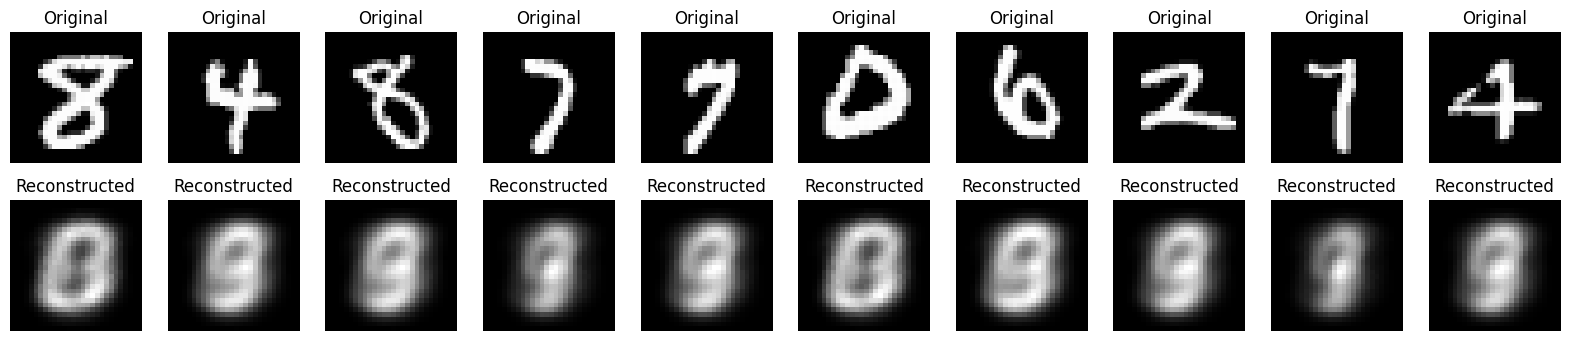

In [261]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input

X_train_norm = X_train.astype('float32') / 255.0
X_test_norm = X_test.astype('float32') / 255.0

X_train_reshaped = X_train_norm.reshape(-1, 28*28)  # Autoencoder 입력 형태
X_test_reshaped = X_test_norm.reshape(-1, 28*28)

# 2. Autoencoder 모델 구성
input_dim = X_train_reshaped.shape[1]  # 784

# 인코더
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# 디코더
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder 모델
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 3. 모델 학습
autoencoder.fit(X_train_reshaped, X_train_reshaped, epochs=10, batch_size=256, validation_split=0.2, verbose=1)

# 4. 재구성 결과 확인
decoded_imgs = autoencoder.predict(X_test_reshaped)

n = 10  # 몇 개의 이미지를 표시할지
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # 재구성
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()


In [265]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, LayerNormalization, MultiHeadAttention, Dropout, Lambda
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

X_train_norm = X_train.astype('float32') / 255.0
X_test_norm = X_test.astype('float32') / 255.0

X_train_reshaped = X_train_norm.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test_norm.reshape(-1, 28, 28, 1)

# 2. 패치 분할을 위한 Lambda 레이어 정의
def extract_patches(inputs, patch_size):
    patches = tf.image.extract_patches(
        images=inputs,
        sizes=[1, patch_size, patch_size, 1],
        strides=[1, patch_size, patch_size, 1],
        rates=[1, 1, 1, 1],
        padding='VALID'
    )
    patch_dim = patches.shape[-1]
    patches = tf.reshape(patches, [-1, patches.shape[1] * patches.shape[2], patch_dim])
    return patches

# 3. Transformer 블록 정의
def transformer_block(inputs, num_heads, ff_dim, dropout=0.1):
    attention = MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(inputs, inputs)
    attention = Dropout(dropout)(attention)
    attention = LayerNormalization(epsilon=1e-6)(inputs + attention)

    ff = Dense(ff_dim, activation="relu")(attention)
    ff = Dense(inputs.shape[-1])(ff)
    ff = Dropout(dropout)(ff)
    outputs = LayerNormalization(epsilon=1e-6)(attention + ff)
    return outputs

# 4. Vision Transformer 모델 정의
def create_vit_model(input_shape, num_classes, patch_size=7):
    inputs = Input(shape=input_shape)
    patches = Lambda(extract_patches, arguments={'patch_size': patch_size})(inputs)  # Lambda 레이어 사용
    transformer = transformer_block(patches, num_heads=4, ff_dim=128)
    transformer = Flatten()(transformer)
    outputs = Dense(num_classes, activation='softmax')(transformer)

    model = Model(inputs, outputs)
    return model

# 5. 모델 학습 및 평가
vit_model = create_vit_model((28, 28, 1), 10)
vit_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

vit_model.fit(X_train_reshaped, y_train_categorical, epochs=10, batch_size=256, validation_split=0.2, verbose=1)
test_loss, test_acc = vit_model.evaluate(X_test_reshaped, y_test_categorical, verbose=1)
print(f"Test Accuracy (ViT): {test_acc:.4f}")

Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 30s 154ms/step - accuracy: 0.2078 - loss: 2.2760 - val_accuracy: 0.8428 - val_loss: 0.5100
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 24s 135ms/step - accuracy: 0.8541 - loss: 0.4734 - val_accuracy: 0.9102 - val_loss: 0.3006
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 40s 130ms/step - accuracy: 0.9074 - loss: 0.3141 - val_accuracy: 0.9347 - val_loss: 0.2178
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 27s 156ms/step - accuracy: 0.9267 - loss: 0.2440 - val_accuracy: 0.9398 - val_loss: 0.1940
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 38s 138ms/step - accuracy: 0.9384 - loss: 0.2019 - val_accuracy: 0.9412 - val_loss: 0.1894
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 129ms/step - accuracy: 0.9443 - loss: 0.1830 - val_accuracy: 0.9542 - val_loss: 0.1545
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 44s 148ms/step - accuracy: 0.9491 - loss: 0.1652 - val_accuracy: 0.9586 - val_loss: 0.1348
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 27s 152ms/step - accuracy: 0.9555 - loss: 0

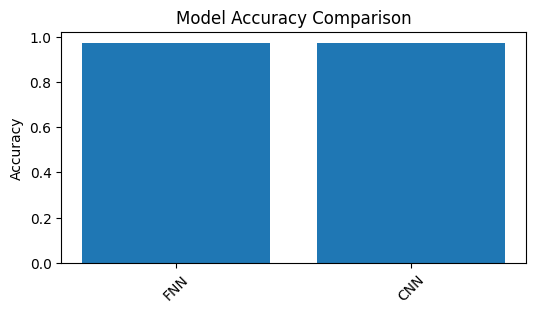

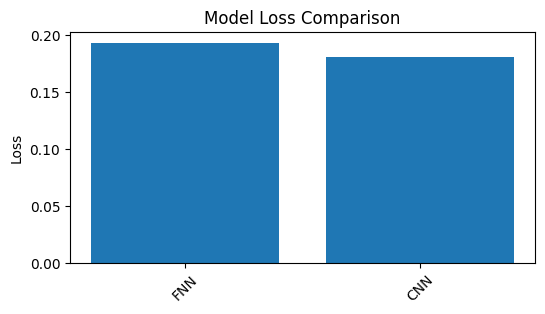

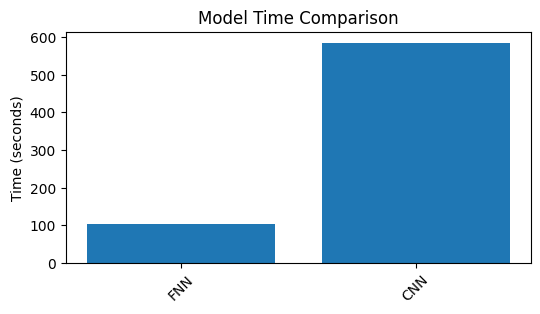

In [248]:
# 모델 비교 시각화
accuracies = [results[model]['accuracy'] for model in results.keys()]
losses = [results[model]['loss'] for model in results.keys()]
times = [results[model]['time'] for model in results.keys()]

plt.figure(figsize=(6, 3))
plt.bar(results.keys(), accuracies)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.show()

plt.figure(figsize=(6, 3))
plt.bar(results.keys(), losses)
plt.title("Model Loss Comparison")
plt.xticks(rotation=45)
plt.ylabel("Loss")
plt.show()

plt.figure(figsize=(6, 3))
plt.bar(results.keys(), times)
plt.title("Model Time Comparison")
plt.xticks(rotation=45)
plt.ylabel("Time (seconds)")
plt.show()

In [249]:
# 최적의 모델 저장
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
print(f"Best Model: {best_model_name} with Accuracy = {results[best_model_name]['accuracy']:.4f}")
if best_model_name in models_ml:
    joblib.dump(models_ml[best_model_name], f'bestmodel_{best_model_name}.pkl')
else:
    models_dl[best_model_name].save(f'/content/drive/MyDrive/Colab Notebooks/PORTFOLIO-GITHUB/SideProjects/MachineLearning/models/bestmodel_{best_model_name}.keras')

Best Model: CNN with Accuracy = 0.9723


NameError: name 'models_ml' is not defined

In [250]:
# 최적의 모델 저장
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
print(f"Best Model: {best_model_name} with Accuracy = {results[best_model_name]['accuracy']:.4f}")
models_dl[best_model_name].save(f'/content/drive/MyDrive/Colab Notebooks/PORTFOLIO-GITHUB/SideProjects/MachineLearning/models/bestmodel_{best_model_name}.keras')

Best Model: CNN with Accuracy = 0.9723


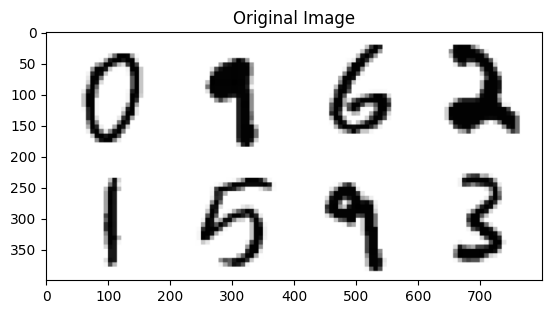

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
The prediction are  [9.9998963e-01 3.7713205e-13 1.9813221e-08 1.3349954e-08 4.4750195e-09
 1.1969332e-12 1.0067638e-05 2.8990868e-10 2.3431163e-07 1.7769571e-08]
The answer is  0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
The prediction are  [4.9629087e-18 1.1384785e-10 1.1149504e-16 4.2220689e-14 9.6077732e-09
 2.6653058e-10 2.0592433e-17 8.5773971e-10 1.1537109e-09 1.0000000e+00]
The answer is  9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
The prediction are  [4.5244214e-10 5.9945688e-18 3.9243148e-14 1.6544098e-12 1.2172693e-10
 2.9205928e-08 1.0000000e+00 1.7458429e-19 3.2334302e-12 2.8520190e-11]
The answer is  6

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
The prediction are  [3.7927505e-23 2.0051954e-19 1.0000000e+00 3.5836218e-13 1.5330412e-23
 3.7963675e-24 1.1871226e-21 2.8497484e-13 5.7792575e-17 5.2266083e-23]
The answer is  2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
The prediction are  [3.51620649e-20 1.00000000e+00 1.82679099e-17 7.36684208e-17
 4.3

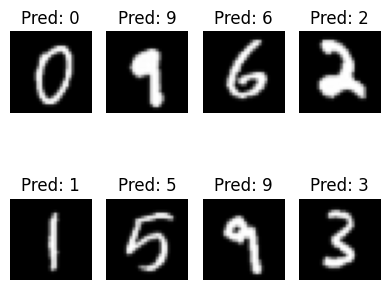

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [244]:
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 1. 이미지 불러오기
uploaded_image_path = '/content/drive/MyDrive/Colab Notebooks/PORTFOLIO-GITHUB/SideProjects/MachineLearning/images/handwritten_nums.png'  # 이미지 파일 경로
orginal_img = Image.open(uploaded_image_path)   # 원본 이미지
converted_img = orginal_img.convert('L')  # 흑백 변환
img_array = np.array(converted_img)
plt.imshow(orginal_img)
plt.title('Original Image')
plt.show()

# 2. 이미지 분할 (4x2)
num_rows, num_cols = 2, 4
digit_images = []

row_height = img_array.shape[0] // num_rows
col_width = img_array.shape[1] // num_cols

for i in range(num_rows):
    for j in range(num_cols):
        digit = img_array[i*row_height:(i+1)*row_height, j*col_width:(j+1)*col_width]
        digit_resized = np.array(Image.fromarray(digit).resize((28, 28)))  # 28x28로 리사이즈

        # 픽셀 값 반전
        digit_inverted = 255 - digit_resized
        digit_images.append(digit_inverted)

flattened_images = [digit_image.flatten() for digit_image in digit_images]  # 모든 이미지 평탄화
# print(np.array(flattened_images).shape)  # (8, 784) - 8개의 1차원 배열
test_data = pd.DataFrame(flattened_images, columns=mnist_data.feature_names)

# 3. 저장된 학습 모델 로드
best_model = load_model('/content/drive/MyDrive/Colab Notebooks/PORTFOLIO-GITHUB/SideProjects/MachineLearning/models/bestmodel_CNN.keras', compile=False)  # 저장된 CNN 모델 경로

# 4. 전처리 및 예측
predictions = []
for digit_image in flattened_images:
    # digit_image = digit_image.astype('float32') / 255   # 정규화
    digit_image = digit_image.reshape(-1, 28, 28, 1)     # CNN 입력 형태
    # pred = best_model.predict(digit_image).argmax(axis=1)[0]   # 클래스 예측
    pred = best_model.predict(digit_image, batch_size=32)   # 클래스 예측
    predictions.append(pred)

    print("The prediction are ", pred[0])
    print("The answer is ", np.argmax(pred[0]))
    print()

# print("Predicted Labels:", predictions)

# 5. 예측 결과
pred_class = []
fig, axes = plt.subplots(2, 4, figsize=(4, 4))
axes = axes.ravel()
for idx, pred in enumerate(predictions):
    # print(f"Digit {idx + 1} Prediction:")
    # for class_idx, prob in enumerate(pred[0]):
    #     print(f"Class {class_idx}: {prob:.4f}")
    # print(f"Predicted Label: {np.argmax(pred[0])}")
    pred_class.append(np.argmax(pred[0]))

    axes[idx].imshow(digit_images[idx], cmap='gray')
    axes[idx].set_title(f"Pred: {np.argmax(pred[0])}")
    axes[idx].axis('off')
plt.tight_layout()
plt.show()

pred_class = pd.DataFrame(pred_class)
test_data = pd.concat([test_data, pred_class], axis=1)
test_data